In [2]:
#test run
#import dependencies 
import pandas as pd
import numpy as np
from IPython.display import clear_output
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from numpy  import array

#import csv's 
nba_seasons = "Seasons_Stats.csv"
nba_players = "Players.csv"
nba_players_data = "player_data.csv"


In [3]:
#write csv's to data frames 
nba_seasons_df = pd.read_csv(nba_seasons)
nba_players = pd.read_csv(nba_players)
nba_players_data = pd.read_csv(nba_players_data)


In [4]:
#view data frame
nba_seasons_df.head()

#how many unique player names do we have
nba_seasons_df['Player'].nunique()

3921

In [5]:
#view data frame
nba_players.head()

,Unnamed: 0,Player,height,weight,collage,born,birth_city,birth_state
0,0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky


In [6]:
#number of total players in this data set
len(nba_players['Player'])

3922

In [7]:
#number of unique players in this data set
nba_players['Player'].nunique()

3921

In [8]:
#see data frame of third csv
nba_players_data.head()



,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University


In [9]:
#take the data frame and rename the column name to player for consistency 
renamed_nba_players_data =nba_players_data.rename(columns ={'name':'Player'})
renamed_nba_players_data.head()

#how many total players in this list
len(renamed_nba_players_data['Player'])


4550

In [10]:
#how many unique players
renamed_nba_players_data['Player'].nunique()

4500

In [11]:
#view seasons dataframe
nba_seasons_df.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [12]:


#take data frame and create new data frame with these columns
clean_df = nba_seasons_df[{'Year', 'Player','G', 'FG', 'TRB',
       'AST', 'STL', 'BLK', 'PTS',"Pos"}]


#drop all nan values- to have no null values
datax = clean_df.dropna()
datax.head()


,Year,AST,G,BLK,Pos,FG,STL,Player,TRB,PTS
3851,1974.0,166.0,79.0,104.0,C,336.0,80.0,Zaid Abdul-Aziz,923.0,865.0
3852,1974.0,386.0,81.0,283.0,C,948.0,112.0,Kareem Abdul-Jabbar*,1178.0,2191.0
3853,1974.0,141.0,74.0,12.0,SF,303.0,110.0,Don Adams,448.0,759.0
3854,1974.0,56.0,55.0,1.0,PG,64.0,36.0,Rick Adelman,69.0,182.0
3855,1974.0,374.0,72.0,22.0,PG,526.0,137.0,Lucius Allen,291.0,1268.0


In [13]:
#remove rows for players before 1980
df_1980 = datax[datax['Year'] >= 1980] 
df_1980.head()

,Year,AST,G,BLK,Pos,FG,STL,Player,TRB,PTS
5727,1980.0,371.0,82.0,280.0,C,835.0,81.0,Kareem Abdul-Jabbar*,886.0,2034.0
5728,1980.0,87.0,67.0,12.0,PF,153.0,35.0,Tom Abernethy,191.0,362.0
5729,1980.0,322.0,75.0,55.0,C,465.0,108.0,Alvan Adams,609.0,1118.0
5730,1980.0,671.0,80.0,10.0,PG,383.0,106.0,Tiny Archibald*,197.0,1131.0
5731,1980.0,40.0,26.0,15.0,C,27.0,12.0,Dennis Awtrey,115.0,86.0


In [14]:
#remove row for players after 2010
df_2010 = df_1980[df_1980['Year'] <= 2010] 
df_2010.head()

,Year,AST,G,BLK,Pos,FG,STL,Player,TRB,PTS
5727,1980.0,371.0,82.0,280.0,C,835.0,81.0,Kareem Abdul-Jabbar*,886.0,2034.0
5728,1980.0,87.0,67.0,12.0,PF,153.0,35.0,Tom Abernethy,191.0,362.0
5729,1980.0,322.0,75.0,55.0,C,465.0,108.0,Alvan Adams,609.0,1118.0
5730,1980.0,671.0,80.0,10.0,PG,383.0,106.0,Tiny Archibald*,197.0,1131.0
5731,1980.0,40.0,26.0,15.0,C,27.0,12.0,Dennis Awtrey,115.0,86.0


In [15]:
#ensure that we have data for all relevent fields
df_2010.count()

Year      14743
AST       14743
G         14743
BLK       14743
Pos       14743
FG        14743
STL       14743
Player    14743
TRB       14743
PTS       14743
dtype: int64

In [16]:
#check type of data in column
df_2010.dtypes

Year      float64
AST       float64
G         float64
BLK       float64
Pos        object
FG        float64
STL       float64
Player     object
TRB       float64
PTS       float64
dtype: object

In [17]:
#prep this data frame for manipulation
nba_players.head()
clean_df1 = nba_players[{'collage','height', 'weight', 'Player'}]
clean_df1.head()




,Player,collage,weight,height
0,Curly Armstrong,Indiana University,77.0,180.0
1,Cliff Barker,University of Kentucky,83.0,188.0
2,Leo Barnhorst,University of Notre Dame,86.0,193.0
3,Ed Bartels,North Carolina State University,88.0,196.0
4,Ralph Beard,University of Kentucky,79.0,178.0


In [18]:
#reorder column names
clean_df2 = clean_df1[['Player', 'collage','height', 'weight']]
clean_df2.head()


,Player,collage,height,weight
0,Curly Armstrong,Indiana University,180.0,77.0
1,Cliff Barker,University of Kentucky,188.0,83.0
2,Leo Barnhorst,University of Notre Dame,193.0,86.0
3,Ed Bartels,North Carolina State University,196.0,88.0
4,Ralph Beard,University of Kentucky,178.0,79.0


In [19]:
#view prior dataframe
df_2010.head()

,Year,AST,G,BLK,Pos,FG,STL,Player,TRB,PTS
5727,1980.0,371.0,82.0,280.0,C,835.0,81.0,Kareem Abdul-Jabbar*,886.0,2034.0
5728,1980.0,87.0,67.0,12.0,PF,153.0,35.0,Tom Abernethy,191.0,362.0
5729,1980.0,322.0,75.0,55.0,C,465.0,108.0,Alvan Adams,609.0,1118.0
5730,1980.0,671.0,80.0,10.0,PG,383.0,106.0,Tiny Archibald*,197.0,1131.0
5731,1980.0,40.0,26.0,15.0,C,27.0,12.0,Dennis Awtrey,115.0,86.0


In [20]:


#add blank column names for indices

for newcol in ['O_Index','D_Index','Overall_Index']:
    df_2010[newcol]=0
    
df_2010.head()


C:\Users\adamy\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Year,AST,G,BLK,Pos,FG,STL,Player,TRB,PTS,O_Index,D_Index,Overall_Index
5727,1980.0,371.0,82.0,280.0,C,835.0,81.0,Kareem Abdul-Jabbar*,886.0,2034.0,0,0,0
5728,1980.0,87.0,67.0,12.0,PF,153.0,35.0,Tom Abernethy,191.0,362.0,0,0,0
5729,1980.0,322.0,75.0,55.0,C,465.0,108.0,Alvan Adams,609.0,1118.0,0,0,0
5730,1980.0,671.0,80.0,10.0,PG,383.0,106.0,Tiny Archibald*,197.0,1131.0,0,0,0
5731,1980.0,40.0,26.0,15.0,C,27.0,12.0,Dennis Awtrey,115.0,86.0,0,0,0


In [21]:
#weighted values used for each stat
    #TRB = .4 :used defensively to keep opposing team from extra offensive 
                #positions or give team extra offensive positions
    #FG = .1 :included because not dependant on referee calls
    #AST = .2 :creating scoring opportunities for other players
    #BLK = .3 :protecting rim
    #PTS = .7 :most objective way to measure offensive production
    #STL = .3 :taking ball away from offense

#set games played to a list
Games_played = df_2010.G.tolist()
#find number of individual seasons played
len(Games_played)

14743

In [22]:
#for loop through data frame using itterows and run formulas against the values

for index, row in df_2010.iterrows():
    
    clear_output(wait=True)

    # get stats numbers from df
    #rebound_count = row['TRB']
    #block_count = row['BLK']
    #steal_count = row['STL']
    #game_count = row['G']
    
    defensive_value = ((.4 * row['TRB'])+(.3 * row['BLK'])+(.3 * row['STL']))/row['G']
    offensive_value = ((.1 * row["FG"])+(.2 * row["AST"])+(.7 * row["PTS"]))/row['G']
    
    overall_value = defensive_value + offensive_value
    
    Points_pg = row['PTS']/row['G']
    AST_PG = row['AST']/row['G']
    RP_G = row['TRB']/row['G']
    BLK_PG = row['BLK']/row['G']
    STL_PG = row['STL']/row['G']
    FG_PG = row['FG']/row['G']
    
    
    df_2010.loc[index, 'O_Index'] = offensive_value
    df_2010.loc[index, 'D_Index'] = defensive_value
    df_2010.loc[index, 'Overall_Index'] = overall_value
    df_2010.loc[index, 'PPG'] = Points_pg
    df_2010.loc[index, 'ASTPG'] = AST_PG
    df_2010.loc[index, 'RPG'] = RP_G
    df_2010.loc[index, 'BLKPG'] = BLK_PG
    df_2010.loc[index, 'STLPG'] = STL_PG
    df_2010.loc[index, 'FGPG'] = FG_PG
    
    #this is just a progress bar- the for loop takes about 1 hour
    print("current progress:", np.round(index/len(df_2010) *100, 2), "%")
    #139%
    
    #df_2010.loc[index, 'Overall_Index'] = results_lng
 #view data frame with new columns attached  
df_2010.head(10)

current progress: 139.04 %


,Year,AST,G,BLK,Pos,FG,STL,Player,TRB,PTS,O_Index,D_Index,Overall_Index,PPG,ASTPG,RPG,BLKPG,STLPG,FGPG
5727,1980.0,371.0,82.0,280.0,C,835.0,81.0,Kareem Abdul-Jabbar*,886.0,2034.0,19.286585,5.642683,24.929268,24.804878,4.524390,10.804878,3.414634,0.987805,10.182927
5728,1980.0,87.0,67.0,12.0,PF,153.0,35.0,Tom Abernethy,191.0,362.0,4.270149,1.350746,5.620896,5.402985,1.298507,2.850746,0.179104,0.522388,2.283582
5729,1980.0,322.0,75.0,55.0,C,465.0,108.0,Alvan Adams,609.0,1118.0,11.913333,3.900000,15.813333,14.906667,4.293333,8.120000,0.733333,1.440000,6.200000
5730,1980.0,671.0,80.0,10.0,PG,383.0,106.0,Tiny Archibald*,197.0,1131.0,12.052500,1.420000,13.472500,14.137500,8.387500,2.462500,0.125000,1.325000,4.787500
5731,1980.0,40.0,26.0,15.0,C,27.0,12.0,Dennis Awtrey,115.0,86.0,2.726923,2.080769,4.807692,3.307692,1.538462,4.423077,0.576923,0.461538,1.038462
5732,1980.0,26.0,20.0,4.0,SG,16.0,7.0,Gus Bailey,28.0,38.0,1.670000,0.725000,2.395000,1.900000,1.300000,1.400000,0.200000,0.350000,0.800000
5733,1980.0,28.0,67.0,54.0,PF,122.0,21.0,James Bailey,197.0,312.0,3.525373,1.511940,5.037313,4.656716,0.417910,2.940299,0.805970,0.313433,1.820896
5734,1980.0,159.0,82.0,36.0,SF,545.0,90.0,Greg Ballard,638.0,1277.0,11.953659,3.573171,15.526829,15.573171,1.939024,7.780488,0.439024,1.097561,6.646341
5735,1980.0,279.0,77.0,49.0,SF,384.0,85.0,Mike Bantom,456.0,908.0,9.477922,2.890909,12.368831,11.792208,3.623377,5.922078,0.636364,1.103896,4.987013
5736,1980.0,18.0,20.0,12.0,PF,24.0,5.0,Marvin Barnes,77.0,64.0,2.540000,1.795000,4.335000,3.200000,0.900000,3.850000,0.600000,0.250000,1.200000


In [40]:
#write new data frame to csv
df_2010.to_csv('test-position.csv')

In [41]:

#who had the highest offensive index over the period
df_2010.loc[df_2010['O_Index'].idxmax()]




Year                        1987
AST                          377
G                             82
BLK                          125
Pos                           SG
FG                          1098
STL                          236
Player           Michael Jordan*
TRB                          430
PTS                         3041
O_Index                  28.2183
D_Index                  3.41829
Overall_Index            31.6366
PPG                      37.0854
ASTPG                    4.59756
RPG                       5.2439
BLKPG                    1.52439
STLPG                    2.87805
FGPG                     13.3902
Name: 8469, dtype: object

In [42]:
#highest defensive index
df_2010.loc[df_2010['D_Index'].idxmax()]

Year                       1992
AST                         191
G                            82
BLK                          70
Pos                          PF
FG                          342
STL                          68
Player           Dennis Rodman*
TRB                        1530
PTS                         800
O_Index                  7.7122
D_Index                 7.96829
Overall_Index           15.6805
PPG                      9.7561
ASTPG                   2.32927
RPG                     18.6585
BLKPG                  0.853659
STLPG                  0.829268
FGPG                    4.17073
Name: 10801, dtype: object

In [43]:
#highest overall index
df_2010.loc[df_2010['Overall_Index'].idxmax()]

Year                        1987
AST                          377
G                             82
BLK                          125
Pos                           SG
FG                          1098
STL                          236
Player           Michael Jordan*
TRB                          430
PTS                         3041
O_Index                  28.2183
D_Index                  3.41829
Overall_Index            31.6366
PPG                      37.0854
ASTPG                    4.59756
RPG                       5.2439
BLKPG                    1.52439
STLPG                    2.87805
FGPG                     13.3902
Name: 8469, dtype: object

In [44]:
#highest ppg over period
df_2010.loc[df_2010['PPG'].idxmax()]


Year                        1987
AST                          377
G                             82
BLK                          125
Pos                           SG
FG                          1098
STL                          236
Player           Michael Jordan*
TRB                          430
PTS                         3041
O_Index                  28.2183
D_Index                  3.41829
Overall_Index            31.6366
PPG                      37.0854
ASTPG                    4.59756
RPG                       5.2439
BLKPG                    1.52439
STLPG                    2.87805
FGPG                     13.3902
Name: 8469, dtype: object

In [45]:
#most blocks per game
df_2010.loc[df_2010['BLKPG'].idxmax()]

Year                   1985
AST                     124
G                        82
BLK                     456
Pos                       C
FG                      302
STL                      36
Player           Mark Eaton
TRB                     927
PTS                     794
O_Index             7.44878
D_Index             6.32195
Overall_Index       13.7707
PPG                 9.68293
ASTPG                1.5122
RPG                 11.3049
BLKPG               5.56098
STLPG              0.439024
FGPG                3.68293
Name: 7638, dtype: object

In [46]:
#most assists per game
df_2010.loc[df_2010['ASTPG'].idxmax()]


Year                       1990
AST                        1134
G                            78
BLK                          18
Pos                          PG
FG                          472
STL                         207
Player           John Stockton*
TRB                         206
PTS                        1345
O_Index                 15.5833
D_Index                 1.92179
Overall_Index           17.5051
PPG                     17.2436
ASTPG                   14.5385
RPG                     2.64103
BLKPG                  0.230769
STLPG                   2.65385
FGPG                    6.05128
Name: 9923, dtype: object

In [47]:
#most steals per game
df_2010.loc[df_2010['STLPG'].idxmax()]


Year                        1986
AST                          448
G                             82
BLK                           40
Pos                           SG
FG                           562
STL                          301
Player           Alvin Robertson
TRB                          516
PTS                         1392
O_Index                   13.661
D_Index                  3.76463
Overall_Index            17.4256
PPG                      16.9756
ASTPG                    5.46341
RPG                      6.29268
BLKPG                   0.487805
STLPG                    3.67073
FGPG                     6.85366
Name: 8191, dtype: object

In [48]:
#most fg per game
df_2010.loc[df_2010['FGPG'].idxmax()]


Year                        1987
AST                          377
G                             82
BLK                          125
Pos                           SG
FG                          1098
STL                          236
Player           Michael Jordan*
TRB                          430
PTS                         3041
O_Index                  28.2183
D_Index                  3.41829
Overall_Index            31.6366
PPG                      37.0854
ASTPG                    4.59756
RPG                       5.2439
BLKPG                    1.52439
STLPG                    2.87805
FGPG                     13.3902
Name: 8469, dtype: object

In [49]:
#10 highest overall index years 
df_2010.nlargest(10, ['Overall_Index'])

,Year,AST,G,BLK,Pos,FG,STL,Player,TRB,PTS,O_Index,D_Index,Overall_Index,PPG,ASTPG,RPG,BLKPG,STLPG,FGPG
8469,1987.0,377.0,82.0,125.0,SG,1098.0,236.0,Michael Jordan*,430.0,3041.0,28.218293,3.418293,31.636585,37.085366,4.597561,5.243902,1.524390,2.878049,13.390244
8869,1988.0,485.0,82.0,131.0,SG,1069.0,259.0,Michael Jordan*,449.0,2868.0,26.969512,3.617073,30.586585,34.975610,5.914634,5.475610,1.597561,3.158537,13.036585
6672,1982.0,142.0,81.0,125.0,C,945.0,76.0,Moses Malone*,1188.0,2520.0,23.295062,6.611111,29.906173,31.111111,1.753086,14.666667,1.543210,0.938272,11.666667
9297,1989.0,650.0,81.0,65.0,SG,966.0,234.0,Michael Jordan*,652.0,2633.0,25.551852,4.327160,29.879012,32.506173,8.024691,8.049383,0.802469,2.888889,11.925926
9747,1990.0,519.0,82.0,54.0,SG,1034.0,227.0,Michael Jordan*,565.0,2753.0,26.028049,3.784146,29.812195,33.573171,6.329268,6.890244,0.658537,2.768293,12.609756
17742,2006.0,360.0,80.0,30.0,SG,978.0,147.0,Kobe Bryant,425.0,2832.0,26.902500,2.788750,29.691250,35.400000,4.500000,5.312500,0.375000,1.837500,12.225000
14806,2000.0,299.0,79.0,239.0,C,956.0,36.0,Shaquille O'Neal*,1078.0,2344.0,22.736709,6.502532,29.239241,29.670886,3.784810,13.645570,3.025316,0.455696,12.101266
11106,1993.0,428.0,78.0,61.0,SG,992.0,221.0,Michael Jordan*,522.0,2541.0,25.173077,3.761538,28.934615,32.576923,5.487179,6.692308,0.782051,2.833333,12.717949
11731,1994.0,381.0,80.0,265.0,C,840.0,139.0,David Robinson*,855.0,2383.0,22.853750,5.790000,28.643750,29.787500,4.762500,10.687500,3.312500,1.737500,10.500000
11685,1994.0,195.0,81.0,231.0,C,953.0,76.0,Shaquille O'Neal*,1072.0,2377.0,22.200000,6.430864,28.630864,29.345679,2.407407,13.234568,2.851852,0.938272,11.765432


In [50]:
#find ten largest defensive values--dropped Kevin Willis, only played 2 
                                            #games but scored high stats
df_2010.nlargest(10, ['D_Index'])

,Year,AST,G,BLK,Pos,FG,STL,Player,TRB,PTS,O_Index,D_Index,Overall_Index,PPG,ASTPG,RPG,BLKPG,STLPG,FGPG
10801,1992.0,191.0,82.0,70.0,PF,342.0,68.0,Dennis Rodman*,1530.0,800.0,7.712195,7.968293,15.680488,9.756098,2.329268,18.658537,0.853659,0.829268,4.170732
12281,1995.0,3.0,2.0,3.0,PF,16.0,1.0,Kevin Willis,36.0,42.0,15.800000,7.800000,23.600000,21.000000,1.500000,18.000000,1.500000,0.500000,8.000000
11248,1993.0,102.0,62.0,45.0,PF,183.0,48.0,Dennis Rodman*,1132.0,468.0,5.908065,7.753226,13.661290,7.548387,1.645161,18.258065,0.725806,0.774194,2.951613
9840,1990.0,234.0,82.0,376.0,C,806.0,174.0,Hakeem Olajuwon*,1149.0,1995.0,18.584146,7.617073,26.201220,24.329268,2.853659,14.012195,4.585366,2.121951,9.829268
16447,2003.0,120.0,73.0,230.0,C,210.0,104.0,Ben Wallace,1126.0,506.0,5.468493,7.542466,13.010959,6.931507,1.643836,15.424658,3.150685,1.424658,2.876712
10293,1991.0,131.0,56.0,221.0,C,487.0,121.0,Hakeem Olajuwon*,770.0,1187.0,16.175000,7.332143,23.507143,21.196429,2.339286,13.750000,3.946429,2.160714,8.696429
11737,1994.0,184.0,79.0,32.0,PF,156.0,52.0,Dennis Rodman*,1367.0,370.0,3.941772,7.240506,11.182278,4.683544,2.329114,17.303797,0.405063,0.658228,1.974684
9382,1989.0,149.0,82.0,282.0,C,790.0,213.0,Hakeem Olajuwon*,1105.0,2034.0,18.690244,7.201220,25.891463,24.804878,1.817073,13.475610,3.439024,2.597561,9.634146
7045,1983.0,101.0,78.0,157.0,C,654.0,89.0,Moses Malone*,1194.0,1908.0,18.220513,7.069231,25.289744,24.461538,1.294872,15.307692,2.012821,1.141026,8.384615
12185,1995.0,97.0,49.0,23.0,PF,137.0,31.0,Dennis Rodman*,823.0,349.0,5.661224,7.048980,12.710204,7.122449,1.979592,16.795918,0.469388,0.632653,2.795918


In [51]:
#find ten largest fg per game values
df_2010.nlargest(10, ['FGPG'])

,Year,AST,G,BLK,Pos,FG,STL,Player,TRB,PTS,O_Index,D_Index,Overall_Index,PPG,ASTPG,RPG,BLKPG,STLPG,FGPG
8469,1987.0,377.0,82.0,125.0,SG,1098.0,236.0,Michael Jordan*,430.0,3041.0,28.218293,3.418293,31.636585,37.085366,4.597561,5.243902,1.524390,2.878049,13.390244
5848,1980.0,202.0,78.0,79.0,SG,1024.0,110.0,George Gervin*,403.0,2585.0,25.029487,2.793590,27.823077,33.141026,2.589744,5.166667,1.012821,1.410256,13.128205
8869,1988.0,485.0,82.0,131.0,SG,1069.0,259.0,Michael Jordan*,449.0,2868.0,26.969512,3.617073,30.586585,34.975610,5.914634,5.475610,1.597561,3.158537,13.036585
11106,1993.0,428.0,78.0,61.0,SG,992.0,221.0,Michael Jordan*,522.0,2541.0,25.173077,3.761538,28.934615,32.576923,5.487179,6.692308,0.782051,2.833333,12.717949
9747,1990.0,519.0,82.0,54.0,SG,1034.0,227.0,Michael Jordan*,565.0,2753.0,26.028049,3.784146,29.812195,33.573171,6.329268,6.890244,0.658537,2.768293,12.609756
6557,1982.0,187.0,79.0,45.0,SG,993.0,77.0,George Gervin*,392.0,2551.0,24.334177,2.448101,26.782278,32.291139,2.367089,4.962025,0.569620,0.974684,12.569620
7722,1985.0,204.0,55.0,15.0,SF,691.0,71.0,Bernard King*,317.0,1809.0,25.021818,2.774545,27.796364,32.890909,3.709091,5.763636,0.272727,1.290909,12.563636
17742,2006.0,360.0,80.0,30.0,SG,978.0,147.0,Kobe Bryant,425.0,2832.0,26.902500,2.788750,29.691250,35.400000,4.500000,5.312500,0.375000,1.837500,12.225000
14806,2000.0,299.0,79.0,239.0,C,956.0,36.0,Shaquille O'Neal*,1078.0,2344.0,22.736709,6.502532,29.239241,29.670886,3.784810,13.645570,3.025316,0.455696,12.101266
10212,1991.0,453.0,82.0,83.0,SG,990.0,223.0,Michael Jordan*,492.0,2580.0,24.336585,3.519512,27.856098,31.463415,5.524390,6.000000,1.012195,2.719512,12.073171


In [52]:
#find ten largest offensive index values
df_2010.nlargest(10, ['O_Index'])


,Year,AST,G,BLK,Pos,FG,STL,Player,TRB,PTS,O_Index,D_Index,Overall_Index,PPG,ASTPG,RPG,BLKPG,STLPG,FGPG
8469,1987.0,377.0,82.0,125.0,SG,1098.0,236.0,Michael Jordan*,430.0,3041.0,28.218293,3.418293,31.636585,37.085366,4.597561,5.243902,1.524390,2.878049,13.390244
8869,1988.0,485.0,82.0,131.0,SG,1069.0,259.0,Michael Jordan*,449.0,2868.0,26.969512,3.617073,30.586585,34.975610,5.914634,5.475610,1.597561,3.158537,13.036585
17742,2006.0,360.0,80.0,30.0,SG,978.0,147.0,Kobe Bryant,425.0,2832.0,26.902500,2.788750,29.691250,35.400000,4.500000,5.312500,0.375000,1.837500,12.225000
9747,1990.0,519.0,82.0,54.0,SG,1034.0,227.0,Michael Jordan*,565.0,2753.0,26.028049,3.784146,29.812195,33.573171,6.329268,6.890244,0.658537,2.768293,12.609756
17904,2006.0,532.0,72.0,10.0,PG,815.0,140.0,Allen Iverson*,232.0,2377.0,25.719444,1.913889,27.633333,33.013889,7.388889,3.222222,0.138889,1.944444,11.319444
9297,1989.0,650.0,81.0,65.0,SG,966.0,234.0,Michael Jordan*,652.0,2633.0,25.551852,4.327160,29.879012,32.506173,8.024691,8.049383,0.802469,2.888889,11.925926
11106,1993.0,428.0,78.0,61.0,SG,992.0,221.0,Michael Jordan*,522.0,2541.0,25.173077,3.761538,28.934615,32.576923,5.487179,6.692308,0.782051,2.833333,12.717949
5848,1980.0,202.0,78.0,79.0,SG,1024.0,110.0,George Gervin*,403.0,2585.0,25.029487,2.793590,27.823077,33.141026,2.589744,5.166667,1.012821,1.410256,13.128205
7722,1985.0,204.0,55.0,15.0,SF,691.0,71.0,Bernard King*,317.0,1809.0,25.021818,2.774545,27.796364,32.890909,3.709091,5.763636,0.272727,1.290909,12.563636
16286,2003.0,411.0,75.0,59.0,SG,829.0,124.0,Tracy McGrady,488.0,2407.0,24.666667,3.334667,28.001333,32.093333,5.480000,6.506667,0.786667,1.653333,11.053333


In [53]:
#read in cleaned CSV to avoid running for loop again
nba_positions_clean = "test-position.csv"
nba_positions_df = pd.read_csv(nba_positions_clean)

In [110]:

nba_positions_df_clean = nba_positions_df.drop(['Unnamed: 0'], axis=1)
nba_positions_df_clean.head()

,Year,AST,G,BLK,Pos,FG,STL,Player,TRB,PTS,O_Index,D_Index,Overall_Index,PPG,ASTPG,RPG,BLKPG,STLPG,FGPG
0,1980.0,371.0,82.0,280.0,C,835.0,81.0,Kareem Abdul-Jabbar*,886.0,2034.0,19.286585,5.642683,24.929268,24.804878,4.524390,10.804878,3.414634,0.987805,10.182927
1,1980.0,87.0,67.0,12.0,PF,153.0,35.0,Tom Abernethy,191.0,362.0,4.270149,1.350746,5.620896,5.402985,1.298507,2.850746,0.179104,0.522388,2.283582
2,1980.0,322.0,75.0,55.0,C,465.0,108.0,Alvan Adams,609.0,1118.0,11.913333,3.900000,15.813333,14.906667,4.293333,8.120000,0.733333,1.440000,6.200000
3,1980.0,671.0,80.0,10.0,PG,383.0,106.0,Tiny Archibald*,197.0,1131.0,12.052500,1.420000,13.472500,14.137500,8.387500,2.462500,0.125000,1.325000,4.787500
4,1980.0,40.0,26.0,15.0,C,27.0,12.0,Dennis Awtrey,115.0,86.0,2.726923,2.080769,4.807692,3.307692,1.538462,4.423077,0.576923,0.461538,1.038462


In [111]:
#place column values to list and store as variables
player2=nba_positions_df.Player.tolist()
o_index2=nba_positions_df.O_Index.tolist()
year2=nba_positions_df.Year.tolist()



In [112]:

#return data for just the 1980s

df_1980s = nba_positions_df.loc[(nba_positions_df_clean['Year'] >= 1980) & (nba_positions_df['Year'] < 1990)]                                 

In [113]:
#group by position for each decade and find the mean of the decade population
mean_1980s =  df_1980s.groupby(['Pos']).mean()

center_1980 = mean_1980s.loc["C", "PPG"]
#print(center_1980)
pf_1980 = mean_1980s.loc["PF", "PPG"]
#print(pf_1980)
sg_1980 = mean_1980s.loc["SG", "PPG"]
#print(sg_1980)
pg_1980 = mean_1980s.loc["PG", "PPG"]
#print(pg_1980)
sf_1980 = mean_1980s.loc["SF", "PPG"]
#print(sf_1980)
#sf_1980.dtypes


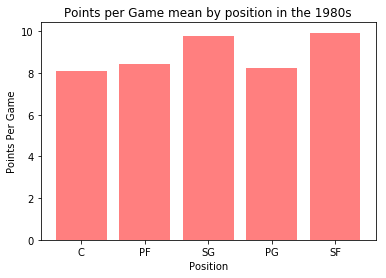

In [114]:
 # Create an array that contains the player data for the 1980s
users = [center_1980, pf_1980, sg_1980, pg_1980, sf_1980]
x_axis = np.arange(len(users))

plt.bar(x_axis, users, color='r', alpha=0.5, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["C", "PF", "SG", "PG", "SF"])
# Give our chart some labels and a tile
plt.title("Points per Game mean by position in the 1980s")
plt.xlabel("Position")
plt.ylabel("Points Per Game")

plt.savefig('PPG mean Pos 80s.png')

In [115]:
#random sampling from the 1980s
#df_1980s['Player'].sample(n=1153, random_state=1)
sample1_1980 = df_1980s.sample(n = 1153)

sample1_1980.head()

sample2_1980 = df_1980s.sample(n = 1153)
sample2_1980.head()
#write samples to csv
sample1_1980.to_csv('sample1_1980.csv')
sample2_1980.to_csv('sample2_1980.csv')

In [116]:
#return data for just the 1990s
df_1990s = nba_positions_df.loc[(nba_positions_df['Year'] >= 1990) & (nba_positions_df['Year'] < 2000)]

In [117]:
#group by position for the decades and find the mean of the decade population
mean_1990s =  df_1990s.groupby(['Pos']).mean()

center_1990 = mean_1990s.loc["C", "PPG"]
#print(center_1980)
pf_1990 = mean_1990s.loc["PF", "PPG"]
#print(pf_1980)
sg_1990 = mean_1990s.loc["SG", "PPG"]
#print(sg_1980)
pg_1990 = mean_1990s.loc["PG", "PPG"]
#print(pg_1980)
sf_1990 = mean_1990s.loc["SF", "PPG"]
#print(sf_1990)
#sf_1980.dtypes


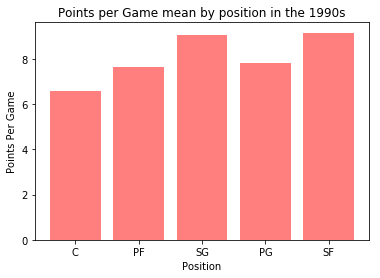

In [118]:
 # Create an array that contains the player data for the 1990s
users2 = [center_1990, pf_1990, sg_1990, pg_1990, sf_1990]
x_axis2 = np.arange(len(users))

plt.bar(x_axis2, users2, color='r', alpha=0.5, align="center")

tick_locations = [value for value in x_axis2]
plt.xticks(tick_locations, ["C", "PF", "SG", "PG", "SF"])
# Give our chart some labels and a tile
plt.title("Points per Game mean by position in the 1990s")
plt.xlabel("Position")
plt.ylabel("Points Per Game")

plt.savefig('PPG mean Pos 90s.png')

In [119]:
#random sampling from the df_1990s
#df_1990s['Player'].sample(n=1153, random_state=1)
sample1_1990 = df_1990s.sample(n = 1153)

#sample1_1990.head()

sample2_1990 = df_1990s.sample(n = 1153)
#sample2_1990.head()

#write samples to a csv
sample1_1990.to_csv('sample1_1990.csv')
sample2_1990.to_csv('sample2_1990.csv')


In [120]:
#group by position for the decades and find the mean of the decade population
df_1990s.groupby(['Pos']).mean()

,Unnamed: 0,Year,AST,G,BLK,FG,STL,TRB,PTS,O_Index,D_Index,Overall_Index,PPG,ASTPG,RPG,BLKPG,STLPG,FGPG
Pos,,,,,,,,,,,,,,,,,,
C,12012.459487,1994.700513,47.827692,46.949744,50.986667,153.495385,25.051282,267.514872,390.995897,5.015861,2.227791,7.243653,6.568422,0.801690,4.603863,0.858025,0.429463,2.576275
PF,12013.582255,1994.703327,65.046211,48.900185,29.851201,178.165434,32.256932,277.450092,458.849353,5.864831,2.223233,8.088064,7.648218,1.072322,4.756455,0.505945,0.562891,2.966145
PF-C,12925.200000,1996.400000,19.400000,34.600000,22.200000,57.400000,15.200000,158.000000,141.000000,3.164829,2.244527,5.409357,4.125114,0.548931,4.784210,0.648548,0.454263,1.674638
PF-SF,10414.000000,1991.250000,11.750000,24.750000,5.750000,42.500000,6.000000,41.750000,98.250000,2.432206,0.721679,3.153885,3.180138,0.344925,1.468672,0.244361,0.203008,1.371241
PG,12053.305015,1994.814739,232.606960,49.962129,6.740020,174.220061,54.952917,113.732856,468.179120,6.535422,1.083238,7.618660,7.808529,3.901487,1.927122,0.112445,0.928854,2.891549
PG-SG,10921.000000,1992.500000,71.000000,29.500000,5.000000,73.500000,24.000000,58.000000,175.000000,5.902764,1.139496,7.042260,7.217445,2.738943,2.101966,0.208845,0.786855,3.027641
SF,12032.453940,1994.739179,98.189789,50.947836,21.251942,212.332963,43.718091,204.432852,555.219756,7.083211,1.693296,8.776506,9.158750,1.616966,3.416021,0.350591,0.739034,3.486921
SF-PF,12000.000000,1995.000000,279.000000,77.000000,62.000000,371.000000,132.000000,572.000000,976.000000,10.079221,3.727273,13.806494,12.675325,3.623377,7.428571,0.805195,1.714286,4.818182
SF-SG,11486.750000,1993.500000,67.750000,31.750000,17.750000,97.000000,39.750000,86.250000,289.500000,5.633375,1.302479,6.935854,7.215981,1.696172,2.260702,0.402073,0.925255,2.429537


In [121]:
#return data for just the 2000s
df_2000s = nba_positions_df.loc[(nba_positions_df['Year'] >= 2000) & (nba_positions_df['Year'] <= 2010)]

In [122]:
#random sampling from the df_2000s
#df_2000s['Player'].sample(n=1153, random_state=1)
sample1_2000 = df_2000s.sample(n = 1153)

#sample1_2000.head()

sample2_2000 = df_2000s.sample(n = 1153)
#sample2_2000.head()
#save samples to csv
sample1_2000.to_csv('sample1_2000.csv')
sample2_2000.to_csv('sample2_2000.csv')

In [123]:
#group this decade by position and find the means
df_2000s.groupby(['Pos']).mean()

,Unnamed: 0,Year,AST,G,BLK,FG,STL,TRB,PTS,O_Index,D_Index,Overall_Index,PPG,ASTPG,RPG,BLKPG,STLPG,FGPG
Pos,,,,,,,,,,,,,,,,,,
C,17491.466935,2005.159677,42.829839,47.963710,47.071774,139.406452,22.579839,264.241129,356.731452,4.577836,2.176606,6.754442,6.000724,0.713908,4.546429,0.804011,0.389436,2.345477
C-PF,17639.705882,2005.411765,39.647059,51.058824,39.000000,120.470588,29.941176,249.235294,306.941176,3.840049,2.056280,5.896329,5.024285,0.635531,4.234823,0.715725,0.492112,1.959431
C-SF,19037.000000,2008.000000,28.000000,47.000000,3.000000,60.000000,15.000000,92.000000,178.000000,2.897872,0.897872,3.795745,3.787234,0.595745,1.957447,0.063830,0.319149,1.276596
PF,17497.206897,2005.155573,65.939856,48.004010,30.358460,175.858059,31.440257,266.286287,457.528468,5.803890,2.149103,7.952993,7.567379,1.076989,4.583096,0.516255,0.536626,2.913272
PF-C,18515.916667,2007.083333,53.250000,50.500000,33.333333,130.250000,31.000000,266.083333,319.166667,4.584163,2.226501,6.810663,5.935122,0.952071,4.721220,0.575565,0.551144,2.391634
PF-SF,18337.727273,2006.545455,47.636364,49.181818,21.272727,115.090909,24.727273,175.272727,311.545455,4.459335,1.601938,6.061273,5.825301,0.818376,3.307401,0.443497,0.486426,2.179491
PG,17379.106538,2005.000807,199.844229,48.711864,6.135593,165.344633,44.399516,116.415658,451.059726,6.279986,1.070404,7.350390,7.598775,3.407771,2.014428,0.107268,0.774842,2.792896
PG-SF,16942.000000,2004.000000,329.000000,66.000000,22.000000,383.000000,51.000000,266.000000,1022.000000,12.416667,1.943939,14.360606,15.484848,4.984848,4.030303,0.333333,0.772727,5.803030
PG-SG,17938.666667,2006.055556,153.500000,52.500000,6.222222,177.833333,39.666667,122.111111,494.833333,6.482468,1.081688,7.564156,8.107405,2.575006,2.117610,0.101871,0.680276,2.922829


In [124]:
#group by position for the decades and find the mean of the decade population
mean_2000s =  df_2000s.groupby(['Pos']).mean()

center_2000 = mean_2000s.loc["C", "PPG"]
#print(center_1980)
pf_2000 = mean_2000s.loc["PF", "PPG"]
#print(pf_1980)
sg_2000 = mean_2000s.loc["SG", "PPG"]
#print(sg_1980)
pg_2000 = mean_2000s.loc["PG", "PPG"]
#print(pg_1980)
sf_2000 = mean_2000s.loc["SF", "PPG"]
#print(sf_2000)
#sf_1980.dtypes


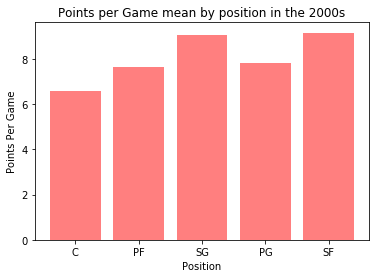

In [125]:
 # Create an array that contains the player data for the 1990s
users3 = [center_2000, pf_2000, sg_2000, pg_2000, sf_2000]
x_axis3 = np.arange(len(users))

plt.bar(x_axis2, users2, color='r', alpha=0.5, align="center")

tick_locations = [value for value in x_axis3]
plt.xticks(tick_locations, ["C", "PF", "SG", "PG", "SF"])
# Give our chart some labels and a tile
plt.title("Points per Game mean by position in the 2000s")
plt.xlabel("Position")
plt.ylabel("Points Per Game")

plt.savefig('PPG mean Pos 2000s.png')

In [126]:
users = [center_1980, pf_1980, sg_1980, pg_1980, sf_1980]  
users2 = [center_1990, pf_1990, sg_1990, pg_1990, sf_1990]
users3 = [center_2000, pf_2000, sg_2000, pg_2000, sf_2000]

#create a data frame using the mean averages for points per game by decade
raw_data = {'Positions': ['C', 'PF', 'SG', 'PG', 'SF'],
        '1980s_average': [center_1980, pf_1980, sg_1980, pg_1980, sf_1980],
        '1990s_average': [center_1990, pf_1990, sg_1990, pg_1990, sf_1990],
        '2000s_average': [center_2000, pf_2000, sg_2000, pg_2000, sf_2000]}
combine = pd.DataFrame(raw_data, columns = ['Positions', '1980s_average', '1990s_average', '2000s_average'])
combine

,Positions,1980s_average,1990s_average,2000s_average
0,C,8.076558,6.568422,6.000724
1,PF,8.422904,7.648218,7.567379
2,SG,9.752490,9.039414,9.078829
3,PG,8.216661,7.808529,7.598775
4,SF,9.931152,9.158750,8.793819


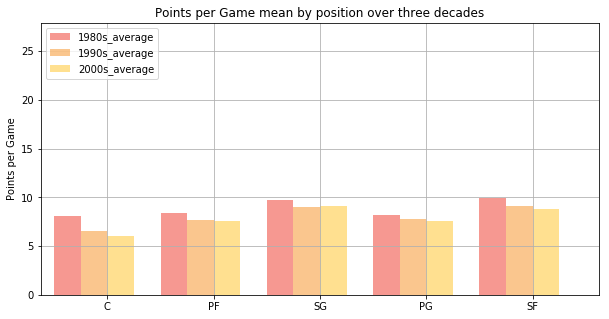

<Figure size 432x288 with 0 Axes>

In [127]:
#compile plots together on one chart

# Setting the positions and width for the bars
pos = list(range(len(combine['1980s_average']))) 
width = 0.25 
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

# Create a bar with 1980s data,
# in position pos,
plt.bar(pos, 
        #using combine['1980s_average'] data,
        combine['1980s_average'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#EE3224', 
        # with label the first value in positions
        label=combine['Positions'][0]) 

# Create a bar with 1990s data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos], 
        #using combine['1990s_average'] data,
        combine['1990s_average'],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#F78F1E', 
        # with label the second value in positions
        label=combine['Positions'][1]) 

# Create a bar with 2000s data,
# in position pos + some width buffer,
plt.bar([p + width*2 for p in pos], 
        #using combine['2000s_average'] data,
        combine['2000s_average'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#FFC222', 
        # with label the third value in positions
        label=combine['Positions'][2]) 

# Set the y axis label
ax.set_ylabel('Points per Game')

# Set the chart's title
ax.set_title('Points per Game mean by position over three decades')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(combine['Positions'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(combine['1980s_average'] + combine['1990s_average'] + combine['2000s_average'])] )

# Adding the legend and showing the plot
plt.legend(['1980s_average', '1990s_average', '2000s_average'], loc='upper left')
plt.grid()
plt.show()

plt.savefig('PPG mean Pos year combined.png')

In [128]:

# find the over all index for each decade by position
center_1980_overall = mean_1980s.loc["C", "Overall_Index"]
#print(center_1980)
pf_1980_overall = mean_1980s.loc["PF", "Overall_Index"]
#print(pf_1980)
sg_1980_overall = mean_1980s.loc["SG", "Overall_Index"]
#print(sg_1980)
pg_1980_overall = mean_1980s.loc["PG", "Overall_Index"]
#print(pg_1980)
sf_1980_overall = mean_1980s.loc["SF", "Overall_Index"]



center_1990_overall = mean_1990s.loc["C", "Overall_Index"]
#print(center_1980)
pf_1990_overall = mean_1990s.loc["PF", "Overall_Index"]
#print(pf_1980)
sg_1990_overall = mean_1990s.loc["SG", "Overall_Index"]
#print(sg_1980)
pg_1990_overall = mean_1990s.loc["PG", "Overall_Index"]
#print(pg_1980)
sf_1990_overall = mean_1990s.loc["SF", "Overall_Index"]


center_2000_overall = mean_2000s.loc["C", "Overall_Index"]
#print(center_1980)
pf_2000_overall = mean_2000s.loc["PF", "Overall_Index"]
#print(pf_1980)
sg_2000_overall = mean_2000s.loc["SG", "Overall_Index"]
#print(sg_1980)
pg_2000_overall = mean_2000s.loc["PG", "Overall_Index"]
#print(pg_1980)
sf_2000_overall = mean_2000s.loc["SF", "Overall_Index"]



In [129]:
#users = [center_1980, pf_1980, sg_1980, pg_1980, sf_1980]  
#users2 = [center_1990, pf_1990, sg_1990, pg_1990, sf_1990]
#users3 = [center_2000, pf_2000, sg_2000, pg_2000, sf_2000]

#create overall index dataframe by position
raw_data1 = {'Positions': ['C', 'PF', 'SG', 'PG', 'SF'],
        '1980s_average': [center_1980_overall, pf_1980_overall, sg_1980_overall, pg_1980_overall, sf_1980_overall],
        '1990s_average': [center_1990_overall, pf_1990_overall, sg_1990_overall, pg_1990_overall, sf_1990_overall],
        '2000s_average': [center_2000_overall, pf_2000_overall, sg_2000_overall, pg_2000_overall, sf_2000_overall]}
combine2 = pd.DataFrame(raw_data1, columns = ['Positions', '1980s_average', '1990s_average', '2000s_average'])
combine2

,Positions,1980s_average,1990s_average,2000s_average
0,C,8.756753,7.243653,6.754442
1,PF,8.845736,8.088064,7.952993
2,SG,8.881639,8.314781,8.388611
3,PG,8.050170,7.618660,7.350390
4,SF,9.419639,8.776506,8.466761


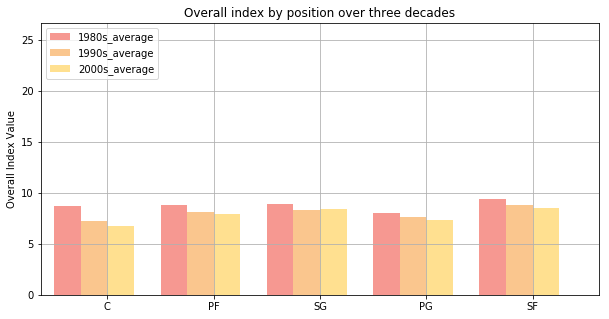

<Figure size 432x288 with 0 Axes>

In [130]:
#compile plots together on one chart


# Setting the positions and width for the bars
pos = list(range(len(combine2['1980s_average']))) 
width = 0.25 
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

# Create a bar with 1980s data,
# in position pos,
plt.bar(pos, 
        #using combine2['1980s'] data,
        combine2['1980s_average'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#EE3224', 
        # with label the first value in position
        label=combine2['Positions'][0]) 

# Create a bar with 1990s data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos], 
        #using combine2['1990s_average'] data,
        combine2['1990s_average'],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#F78F1E', 
        # with label the second value in position
        label=combine2['Positions'][1]) 

# Create a bar with 2000s data,
# in position pos + some width buffer,
plt.bar([p + width*2 for p in pos], 
        #using combine2['2000s_average'] data,
        combine2['2000s_average'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#FFC222', 
        # with label the third value in position
        label=combine2['Positions'][2]) 

# Set the y axis label
ax.set_ylabel('Overall Index Value')

# Set the chart's title
ax.set_title('Overall index by position over three decades')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(combine2['Positions'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(combine2['1980s_average'] + combine2['1990s_average'] + combine2['2000s_average'])] )

# Adding the legend and showing the plot
plt.legend(['1980s_average', '1990s_average', '2000s_average'], loc='upper left')
plt.grid()
plt.show()

plt.savefig('Overall Index 3 Decades.png')

In [131]:
# find the defensive index for each decade by position
center_1980_defensive = mean_1980s.loc["C", "D_Index"]
#print(center_1980)
pf_1980_defensive = mean_1980s.loc["PF", "D_Index"]
#print(pf_1980)
sg_1980_defensive = mean_1980s.loc["SG", "D_Index"]
#print(sg_1980)
pg_1980_defensive = mean_1980s.loc["PG", "D_Index"]
#print(pg_1980)
sf_1980_defensive = mean_1980s.loc["SF", "D_Index"]



center_1990_defensive = mean_1990s.loc["C", "D_Index"]
#print(center_1980)
pf_1990_defensive = mean_1990s.loc["PF", "D_Index"]
#print(pf_1980)
sg_1990_defensive = mean_1990s.loc["SG", "D_Index"]
#print(sg_1980)
pg_1990_defensive = mean_1990s.loc["PG", "D_Index"]
#print(pg_1980)
sf_1990_defensive = mean_1990s.loc["SF", "D_Index"]


center_2000_defensive = mean_2000s.loc["C", "D_Index"]
#print(center_1980)
pf_2000_defensive = mean_2000s.loc["PF", "D_Index"]
#print(pf_1980)
sg_2000_defensive = mean_2000s.loc["SG", "D_Index"]
#print(sg_1980)
pg_2000_defensive = mean_2000s.loc["PG", "D_Index"]
#print(pg_1980)
sf_2000_defensive = mean_2000s.loc["SF", "D_Index"]


In [132]:
#create defensive_index dataframe
raw_data2 = {'Positions': ['C', 'PF', 'SG', 'PG', 'SF'],
        '1980s_average': [center_1980_defensive, pf_1980_defensive, sg_1980_defensive, pg_1980_defensive, sf_1980_defensive],
        '1990s_average': [center_1990_defensive, pf_1990_defensive, sg_1990_defensive, pg_1990_defensive, sf_1990_defensive],
        '2000s_average': [center_2000_defensive, pf_2000_defensive, sg_2000_defensive, pg_2000_defensive, sf_2000_defensive]}
combine3 = pd.DataFrame(raw_data2, columns = ['Positions', '1980s_average', '1990s_average', '2000s_average'])
combine3

,Positions,1980s_average,1990s_average,2000s_average
0,C,2.546427,2.227791,2.176606
1,PF,2.366764,2.223233,2.149103
2,SG,1.188373,1.242891,1.313329
3,PG,1.127939,1.083238,1.070404
4,SF,1.732006,1.693296,1.681302


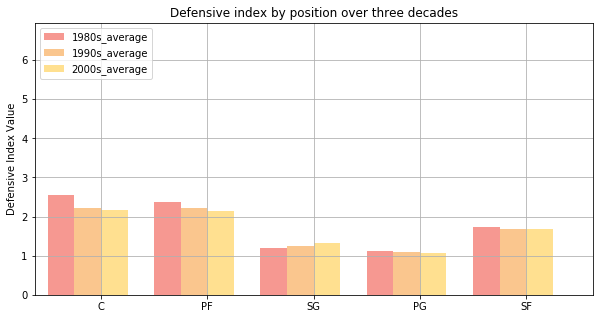

<Figure size 432x288 with 0 Axes>

In [133]:
#compile plots together on one chart


# Setting the positions and width for the bars
pos = list(range(len(combine3['1980s_average']))) 
width = 0.25 
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

# Create a bar with 1980s data,
# in position pos,
plt.bar(pos, 
        #using combine3['1980s_average'] data,
        combine3['1980s_average'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#EE3224', 
        # with label the first value in position
        label=combine3['Positions'][0]) 

# Create a bar with 1990s data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos], 
        #using combine3['1990s_average'] data,
        combine3['1990s_average'],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#F78F1E', 
        # with label the second value in positions
        label=combine3['Positions'][1]) 

# Create a bar with 2000s data,
# in position pos + some width buffer,
plt.bar([p + width*2 for p in pos], 
        #using combine3['2000s_average'] data,
        combine3['2000s_average'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#FFC222', 
        # with label the third value in position
        label=combine3['Positions'][2]) 

# Set the y axis label
ax.set_ylabel('Defensive Index Value')

# Set the chart's title
ax.set_title('Defensive index by position over three decades')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(combine3['Positions'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(combine3['1980s_average'] + combine3['1990s_average'] + combine3['2000s_average'])] )

# Adding the legend and showing the plot
plt.legend(['1980s_average', '1990s_average', '2000s_average'], loc='upper left')
plt.grid()
plt.show()

plt.savefig('PPG D-Index Pos 3 Decades.png')

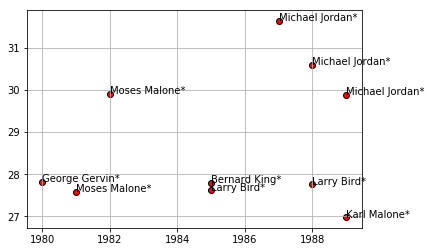

<Figure size 432x288 with 0 Axes>

In [134]:
#10 highest overall scores for overall index 1980s
df_1980s.nlargest(10, ['Overall_Index'])
df_1980s_max = df_1980s.nlargest(10, ['Overall_Index'])
# The maximum x value for our chart will be 100
x_limit = 100

#set x-axis equal to 1980s
x_axis = df_1980s_max.Year

#set y-axis equal to 1980s overall index
o_index2 = df_1980s_max.Overall_Index.tolist()

#take column players to list
player2 = df_1980s_max.Player.tolist()

#take column years to list
year2= df_1980s_max.Year.tolist()

#plot
ax=plt.scatter(year2, o_index2, marker='o', facecolors='red', edgecolors='black')
for label, x, y in zip (player2, year2, o_index2):
   plt.annotate(label, xy= (x, y))
plt.grid()
plt.show()

plt.savefig('80s top ten overall.png')

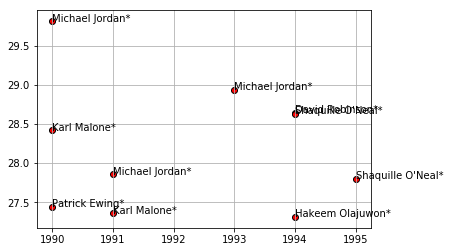

<Figure size 432x288 with 0 Axes>

In [135]:
#10 highest overall scores for overall index 1990s

#10 highest overall scores for overall index 1980s
df_1990s.nlargest(10, ['Overall_Index'])
df_1990s_max = df_1990s.nlargest(10, ['Overall_Index'])
# The maximum x value for our chart will be 100
x_limit = 100

#set x-axis equal to 1990s
x_axis = df_1990s_max.Year

#set y-axis equal to 1990s overall index
o_index3 = df_1990s_max.Overall_Index.tolist()

#take column players to list
player3 = df_1990s_max.Player.tolist()

#take column years to list
year3= df_1990s_max.Year.tolist()

#plot
ax=plt.scatter(year3, o_index3, marker='o', facecolors='red', edgecolors='black')
for label, x, y in zip (player3, year3, o_index3):
   plt.annotate(label, xy= (x, y))
plt.grid()
plt.show()

plt.savefig('90s top ten overall.png')

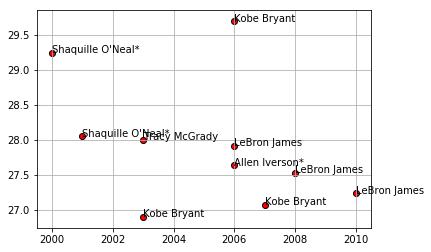

<Figure size 432x288 with 0 Axes>

In [136]:
#10 highest overall scores for overall index 2000s

df_2000s.nlargest(10, ['Overall_Index'])
df_2000s_max = df_2000s.nlargest(10, ['Overall_Index'])
# The maximum x value for our chart will be 100
x_limit = 100

#set x-axis equal to 2000s
x_axis = df_2000s_max.Year

#set y-axis equal to 2000s overall index
o_index4 = df_2000s_max.Overall_Index.tolist()

#take column players to list
player4 = df_2000s_max.Player.tolist()

#take column years to list
year4= df_2000s_max.Year.tolist()

#plot
ax=plt.scatter(year4, o_index4, marker='o', facecolors='red', edgecolors='black')
for label, x, y in zip (player4, year4, o_index4):
   plt.annotate(label, xy= (x, y))
plt.grid()
plt.show()

plt.savefig('2000s top ten overall.png')

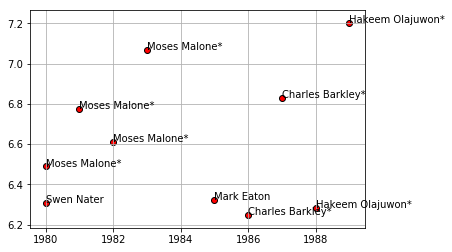

<Figure size 432x288 with 0 Axes>

In [137]:
#10 highest overall scores for defensive index 1980s
df_1980s.nlargest(10, ['D_Index'])
df_1980s_maxd = df_1980s.nlargest(10, ['D_Index'])
# The maximum x value for our chart will be 100
x_limit = 100

#set x-axis equal to 1980s
x_axis = df_1980s_maxd.Year

#set y-axis equal to 1980s overall index
d_index2 = df_1980s_maxd.D_Index.tolist()

#take column players to list
dplayer2 = df_1980s_maxd.Player.tolist()

#take column years to list
dyear2= df_1980s_maxd.Year.tolist()

#plot
ax=plt.scatter(dyear2, d_index2, marker='o', facecolors='red', edgecolors='black')
for label, x, y in zip (dplayer2, dyear2, d_index2):
   plt.annotate(label, xy= (x, y))
plt.grid()
plt.show()

plt.savefig('80s top ten d-index.png')

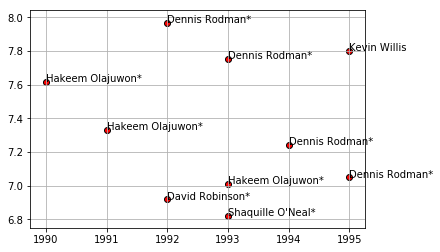

<Figure size 432x288 with 0 Axes>

In [138]:
#10 highest overall scores for defensive index 1990s
df_1990s.nlargest(10, ['D_Index'])
df_1990s_maxd = df_1990s.nlargest(10, ['D_Index'])
# The maximum x value for our chart will be 100
x_limit = 100

#set x-axis equal to 1990s
x_axis = df_1990s_maxd.Year

#set y-axis equal to 1990s overall index
d_index3 = df_1990s_maxd.D_Index.tolist()

#take column players to list
dplayer3 = df_1990s_maxd.Player.tolist()

#take column years to list
dyear3= df_1990s_maxd.Year.tolist()

#plot
ax=plt.scatter(dyear3, d_index3, marker='o', facecolors='red', edgecolors='black')
for label, x, y in zip (dplayer3, dyear3, d_index3):
   plt.annotate(label, xy= (x, y))
plt.grid()
plt.show()

plt.savefig('90s top ten d-index.png')

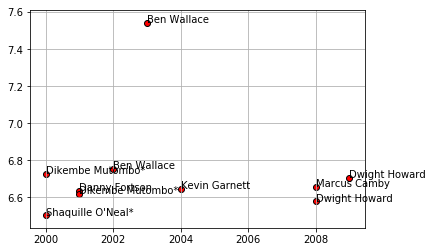

<Figure size 432x288 with 0 Axes>

In [139]:
#10 highest overall scores for defensive index 2000s
df_2000s.nlargest(10, ['D_Index'])
df_2000s_maxd = df_2000s.nlargest(10, ['D_Index'])
# The maximum x value for our chart will be 100
x_limit = 100

#set x-axis equal to 1980s
x_axis = df_2000s_maxd.Year

#set y-axis equal to 1980s overall index
d_index4 = df_2000s_maxd.D_Index.tolist()

#take column players to list
dplayer4 = df_2000s_maxd.Player.tolist()

#take column years to list
dyear4= df_2000s_maxd.Year.tolist()

#plot
ax=plt.scatter(dyear4, d_index4, marker='o', facecolors='red', edgecolors='black')
for label, x, y in zip (dplayer4, dyear4, d_index4):
   plt.annotate(label, xy= (x, y))
plt.grid()
plt.show()

plt.savefig('2000s top ten d-index.png')

In [140]:
df = pd.read_csv('sample1_1980.csv')
nineties = pd.read_csv('sample1_1990.csv')
two_thousands = pd.read_csv('sample1_2000.csv')

In [141]:
# list of strings 
lst = df.Year 
two = df.Player
three = df.Overall_Index
four = df.O_Index
five = df.D_Index
  
# Calling DataFrame constructor after zipping 
# both lists, with columns specified 
df2 = pd.DataFrame(list(zip(lst, two, three, four, five)), 
               columns =['Year', 'Player', 'Overall_index', 'O_index', 'D_index']) 
df2.head()


,Year,Player,Overall_index,O_index,D_index
0,1985.0,Kent Benson,7.388889,5.184722,2.204167
1,1982.0,Roger Phegley,6.297531,5.374074,0.923457
2,1985.0,Kenny Natt,0.850000,0.625000,0.225000
3,1983.0,Kevin McHale*,14.260976,10.736585,3.524390
4,1987.0,Harold Pressley,5.120896,3.797015,1.323881


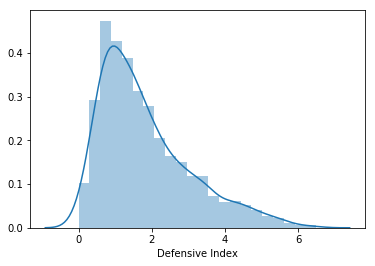

The defensive min is 0.0, the defensive max is 6.49, the defensive mean is 1.81


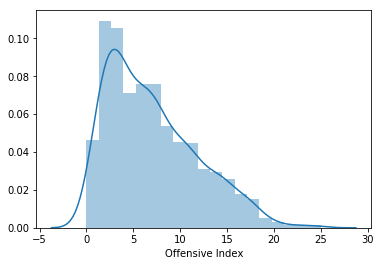

The offensive min is 0.0, the offensive max is 25.03, the offensive mean is 7.02


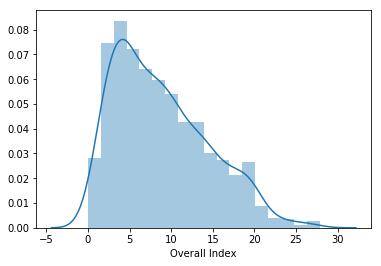

The overall min is 0.0, the overall max is 27.82, the overall mean is 8.83


<Figure size 432x288 with 0 Axes>

In [142]:
#1980s
#set each column to a list/variable 
defensive_indexes = [] 
defensive_indexes = df2.D_index.tolist()
#min, max and mean of defensive index

a = array( defensive_indexes )
#perform math on numpy arrays

d_min = a.min().round(2)
d_max = a.max().round(2)
d_mean = a.mean().round(2)


#set offense index to list/variable
offensive_indexes = []
offensive_indexes = df2.O_index.tolist()


#set list to array
b = array( offensive_indexes )

#perform math on array
o_min = b.min().round(2)
o_max = b.max().round(2)
o_mean = b.mean().round(2)

#set overall index to list/variable
Overall_indexes = []
Overall_indexes = df2.Overall_index.tolist()

#set list to array
c = array( Overall_indexes )

#perform math on array
ov_min = c.min().round(2)
ov_max = c.max().round(2)
ov_mean = c.mean().round(2)

#plot distribution of defensive index of sample
sns.distplot(defensive_indexes, axlabel="Defensive Index")
plt.show()
print(f"The defensive min is {d_min}, the defensive max is {d_max}, the defensive mean is {d_mean}")
plt.savefig('80s distribution sample d-index.png')

#plot distribution of offensive index of sample
sns.distplot(offensive_indexes, axlabel="Offensive Index")
plt.show()
print(f"The offensive min is {o_min}, the offensive max is {o_max}, the offensive mean is {o_mean}")
plt.savefig('80s distribution sample o-index.png')

#plot distribution of overall index of sample
sns.distplot(Overall_indexes, axlabel="Overall Index")
plt.show()
print(f"The overall min is {ov_min}, the overall max is {ov_max}, the overall mean is {ov_mean}")
plt.savefig('80s distribution sample overall-index.png')



In [143]:
#create data frame for variables from the 1990s

# list of variables 
years1 = nineties.Year 
players1 = nineties.Player
ov1 = nineties.Overall_Index
o1 = nineties.O_Index
d1 = nineties.D_Index

# Calling DataFrame constructor after zipping 
# both lists, with columns specified 
nine_sorted = pd.DataFrame(list(zip(years1, players1, ov1, o1, d1)), 
               columns =['Year', 'Player', 'Overall_index', 'O_index', 'D_index']) 

nine_sorted.head(5)

,Year,Player,Overall_index,O_index,D_index
0,1993.0,Tracy Moore,6.292308,5.566667,0.725641
1,1991.0,A.J. Wynder,1.966667,1.716667,0.250000
2,1999.0,Rick Mahorn,1.312500,0.625000,0.687500
3,1999.0,Tony Delk,6.350000,5.566667,0.783333
4,1998.0,Jalen Rose,8.520732,7.313415,1.207317


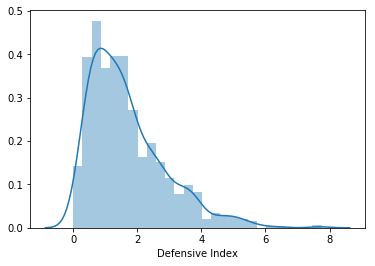

The defensive min is 0.0, the defensive max is 7.75, the defensive mean is 1.68


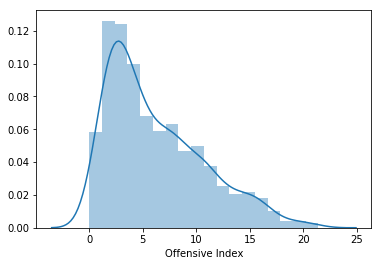

The offensive min is 0.0, the offensive max is 21.41, the offensive mean is 6.24


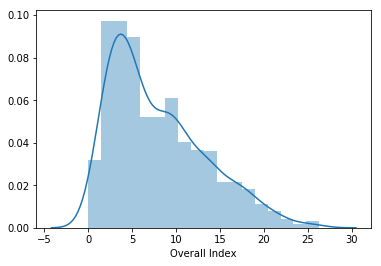

The overall min is 0.0, the overall max is 26.29, the overall mean is 7.92


<Figure size 432x288 with 0 Axes>

In [144]:
#set columns of data frame to a list

#set each column to a list/variable 
defensive_indexes1 = [] 
defensive_indexes1 = nine_sorted.D_index.tolist()
#min, max and mean of defensive index and create a numpy array

#set list to array
a1 = array( defensive_indexes1 )

#perform math on array
d_min1 = a1.min().round(2)
d_max1 = a1.max().round(2)
d_mean1 = a1.mean().round(2)

#set each column to a list/variable 
offensive_indexes1 = []
offensive_indexes1 = nine_sorted.O_index.tolist()


#min, max and mean of defensive index and create a numpy array
b1 = array( offensive_indexes1 )

#perform math on array
o_min1 = b1.min().round(2)
o_max1 = b1.max().round(2)
o_mean1 = b1.mean().round(2)

#set each column to a list/variable 
Overall_indexes1 = []
Overall_indexes1 = nine_sorted.Overall_index.tolist()

#min, max and mean of defensive index and create a numpy array
c1 = array( Overall_indexes1 )
ov_min1 = c1.min().round(2)
ov_max1 = c1.max().round(2)
ov_mean1 = c1.mean().round(2)

#plot distribution of defensive index of sample
sns.distplot(defensive_indexes1, axlabel="Defensive Index")
plt.show()
print(f"The defensive min is {d_min1}, the defensive max is {d_max1}, the defensive mean is {d_mean1}")
plt.savefig('90s distribution sample d-index.png')

#plot distribution of offensive index of sample
sns.distplot(offensive_indexes1, axlabel="Offensive Index")
plt.show()
print(f"The offensive min is {o_min1}, the offensive max is {o_max1}, the offensive mean is {o_mean1}")
plt.savefig('90s distribution sample o-index.png')

#plot distribution of overall index of sample
sns.distplot(Overall_indexes1, axlabel="Overall Index")
plt.show()
print(f"The overall min is {ov_min1}, the overall max is {ov_max1}, the overall mean is {ov_mean1}")
plt.savefig('90s distribution sample overall-index.png')

plt.savefig('2000s distribution sample d-index.png')
plt.savefig('2000s distribution sample o-index.png')
plt.savefig('2000s distribution sample overall-index.png')

In [145]:
#create data frame for variables from the 1990s

# list of variables
years2 = two_thousands.Year 
players2 = two_thousands.Player
ov2 = two_thousands.Overall_Index
o2 = two_thousands.O_Index
d2 = two_thousands.D_Index
  
# Calling DataFrame constructor after zipping 
# both lists, with columns specified 
two_thousand_sorted = pd.DataFrame(list(zip(years2, players2, ov2, o2, d2)), 
               columns =['Year', 'Player', 'Overall_index', 'O_index', 'D_index']) 

two_thousand_sorted.head(5)

,Year,Player,Overall_index,O_index,D_index
0,2007.0,Anthony Roberson,4.805000,4.205000,0.600000
1,2009.0,Anderson Varejao,9.922222,6.530864,3.391358
2,2008.0,Trevor Ariza,5.882857,4.288571,1.594286
3,2003.0,Rasual Butler,7.095833,5.795833,1.300000
4,2006.0,Voshon Lenard,6.028571,5.164286,0.864286


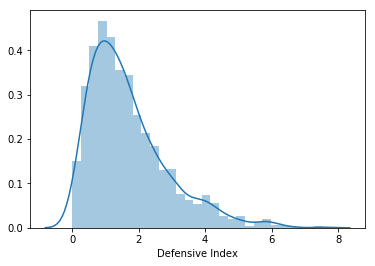

The defensive min is 0.0, the defensive max is 7.54, the defensive mean is 1.69


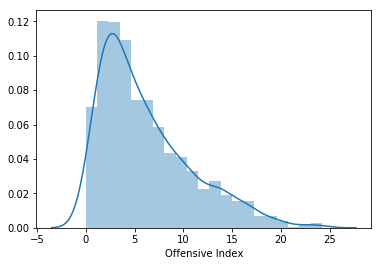

The offensive min is 0.0, the offensive max is 24.22, the offensive mean is 6.14


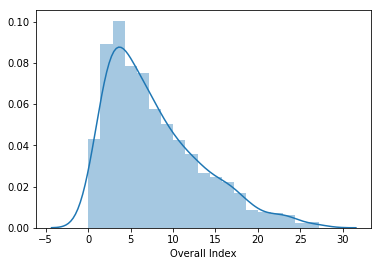

The overall min is 0.0, the overall max is 27.23, the overall mean is 7.83


<Figure size 432x288 with 0 Axes>

In [146]:
#set columns of data frame to a list

#set each column to a list/variable 
defensive_indexes2 = [] 
defensive_indexes2 = two_thousand_sorted.D_index.tolist()
#min, max and mean of defensive index and create a numpy array

#set each column to a list/variable 
a2 = array( defensive_indexes2 )

#perform math on array
d_min2 = a2.min().round(2)
d_max2 = a2.max().round(2)
d_mean2 = a2.mean().round(2)

#set each column to a list/variable 
offensive_indexes2 = []
offensive_indexes2 = two_thousand_sorted.O_index.tolist()


#min, max and mean of defensive index and create a numpy array
b2 = array( offensive_indexes2 )

o_min2 = b2.min().round(2)
o_max2 = b2.max().round(2)
o_mean2 = b2.mean().round(2)

#set each column to a list/variable 
Overall_indexes2 = []
Overall_indexes2 = two_thousand_sorted.Overall_index.tolist()

#min, max and mean of defensive index and create a numpy array
c2 = array( Overall_indexes2 )
ov_min2 = c2.min().round(2)
ov_max2 = c2.max().round(2)
ov_mean2 = c2.mean().round(2)

#plot distribution of defensive index of sample
sns.distplot(defensive_indexes2, axlabel="Defensive Index")
plt.show()
print(f"The defensive min is {d_min2}, the defensive max is {d_max2}, the defensive mean is {d_mean2}")
plt.savefig('2000s distribution sample d-index.png')

#plot distribution of offensive index of sample
sns.distplot(offensive_indexes2, axlabel="Offensive Index")
plt.show()
print(f"The offensive min is {o_min2}, the offensive max is {o_max2}, the offensive mean is {o_mean2}")
plt.savefig('2000s distribution sample o-index.png')

#plot distribution of overall index of sample
sns.distplot(Overall_indexes2, axlabel="Overall Index")
plt.show()
print(f"The overall min is {ov_min2}, the overall max is {ov_max2}, the overall mean is {ov_mean2}")
plt.savefig('2000s distribution sample overall-index.png')

In [154]:
top_10_player = nba_positions_df_clean.nlargest(10, ['Overall_Index'])
top_10_player

,Year,AST,G,BLK,Pos,FG,STL,Player,TRB,PTS,O_Index,D_Index,Overall_Index,PPG,ASTPG,RPG,BLKPG,STLPG,FGPG
2735,1987.0,377.0,82.0,125.0,SG,1098.0,236.0,Michael Jordan*,430.0,3041.0,28.218293,3.418293,31.636585,37.085366,4.597561,5.243902,1.524390,2.878049,13.390244
3134,1988.0,485.0,82.0,131.0,SG,1069.0,259.0,Michael Jordan*,449.0,2868.0,26.969512,3.617073,30.586585,34.975610,5.914634,5.475610,1.597561,3.158537,13.036585
943,1982.0,142.0,81.0,125.0,C,945.0,76.0,Moses Malone*,1188.0,2520.0,23.295062,6.611111,29.906173,31.111111,1.753086,14.666667,1.543210,0.938272,11.666667
3561,1989.0,650.0,81.0,65.0,SG,966.0,234.0,Michael Jordan*,652.0,2633.0,25.551852,4.327160,29.879012,32.506173,8.024691,8.049383,0.802469,2.888889,11.925926
4010,1990.0,519.0,82.0,54.0,SG,1034.0,227.0,Michael Jordan*,565.0,2753.0,26.028049,3.784146,29.812195,33.573171,6.329268,6.890244,0.658537,2.768293,12.609756
11989,2006.0,360.0,80.0,30.0,SG,978.0,147.0,Kobe Bryant,425.0,2832.0,26.902500,2.788750,29.691250,35.400000,4.500000,5.312500,0.375000,1.837500,12.225000
9059,2000.0,299.0,79.0,239.0,C,956.0,36.0,Shaquille O'Neal*,1078.0,2344.0,22.736709,6.502532,29.239241,29.670886,3.784810,13.645570,3.025316,0.455696,12.101266
5366,1993.0,428.0,78.0,61.0,SG,992.0,221.0,Michael Jordan*,522.0,2541.0,25.173077,3.761538,28.934615,32.576923,5.487179,6.692308,0.782051,2.833333,12.717949
5990,1994.0,381.0,80.0,265.0,C,840.0,139.0,David Robinson*,855.0,2383.0,22.853750,5.790000,28.643750,29.787500,4.762500,10.687500,3.312500,1.737500,10.500000
5944,1994.0,195.0,81.0,231.0,C,953.0,76.0,Shaquille O'Neal*,1072.0,2377.0,22.200000,6.430864,28.630864,29.345679,2.407407,13.234568,2.851852,0.938272,11.765432


In [155]:
new_df =  top_10_player[['Player','Overall_Index','Year']].copy()
top_player=new_df.groupby(['Player']).mean()['Overall_Index']
#top_player=total_player.sort_values(by=['Overall_Index'], ascending=False)

dic_tp = {"Player": ["David Robinson*", "Kobe Bryant", "Michael Jordan*", "Moses Malone*", "Shaquille O'Neal*"], "Overall_Average": [28.643750, 29.691250, 30.169799, 29.906173, 28.935052]}
tp_df = pd.DataFrame(data=dic_tp)
tp_df

,Player,Overall_Average
0,David Robinson*,28.643750
1,Kobe Bryant,29.691250
2,Michael Jordan*,30.169799
3,Moses Malone*,29.906173
4,Shaquille O'Neal*,28.935052


In [156]:
total_year_played=new_df.groupby('Player').count()
number_season=total_year_played.rename(columns={"Overall_Index":'Number-Season'})
number_season

,Number-Season,Year
Player,,
David Robinson*,1,1
Kobe Bryant,1,1
Michael Jordan*,5,5
Moses Malone*,1,1
Shaquille O'Neal*,2,2


In [157]:
new_dataframe=pd.merge(tp_df,number_season,on='Player')
new_index=new_dataframe.reset_index()
new_index

,index,Player,Overall_Average,Number-Season,Year
0,0,David Robinson*,28.643750,1,1
1,1,Kobe Bryant,29.691250,1,1
2,2,Michael Jordan*,30.169799,5,5
3,3,Moses Malone*,29.906173,1,1
4,4,Shaquille O'Neal*,28.935052,2,2


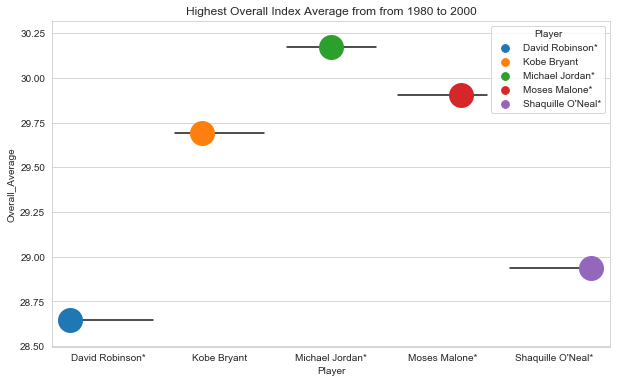

In [161]:
plt.figure(figsize=(10,6))
plt.title('Highest Overall Index Average from from 1980 to 2000')


ax = sns.boxenplot(x="Player", y="Overall_Average", data=new_index,
                   color=".15")
ax = sns.stripplot(x="Player", y="Overall_Average", data=new_index,size=25, dodge=True,hue='Player')
ax =sns.set_style("whitegrid")

plt.savefig('Highester Overall Index Average.png')

In [168]:
quantiles = nba_positions_df_clean.quantile([.25, .50, .75, .100], axis = 0) 
quantiles

,Year,AST,G,BLK,FG,STL,TRB,PTS,O_Index,D_Index,Overall_Index,PPG,ASTPG,RPG,BLKPG,STLPG,FGPG
0.25,1989.0,17.0,27.0,3.0,37.0,9.0,47.0,96.0,2.631789,0.815822,3.620227,3.342928,0.575000,1.586853,0.089744,0.312500,1.281470
0.50,1997.0,64.0,56.0,11.0,134.0,29.0,148.0,345.0,5.127778,1.433333,6.790244,6.509434,1.282051,2.817073,0.234568,0.575000,2.500000
0.75,2004.0,158.0,76.0,30.0,296.0,61.0,304.0,773.0,9.157565,2.331297,11.593052,11.666667,2.560000,4.750000,0.513514,0.933333,4.475900
0.10,1983.0,3.0,9.0,0.0,7.0,2.0,10.0,19.0,1.418118,0.467467,2.042133,1.800000,0.250000,0.913414,0.000000,0.142857,0.666667


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

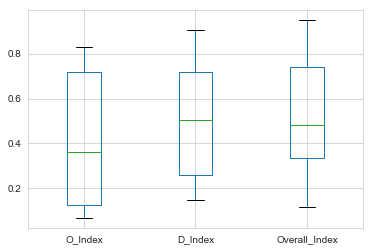

In [174]:

quantiles = pd.DataFrame(np.random.rand(10, 3), columns=['O_Index','D_Index','Overall_Index'])
fig1 = plt.gcf()
plt.show()
plt.draw()
quantiles.plot.box()
fig1.savefig('tessstttyyy.png', dpi=100)
#plt.savefig('Highester Overall Index Average.png')